Name: Lê Hoàng Anh Đức
ID: 11219268
Class: DSEB 63

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
exchange_rates = pd.read_csv('D:\\Năm 3 - HK1\\Visualize\\Ex\\data\\euro-daily-hist_1999_2022.csv', encoding = 'latin')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [3]:
# prepare data
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Period\\Unit:'])
euro_to_dollar = exchange_rates[['Time', '[US dollar ]']].sort_values('Time').set_index('Time')
euro_to_dollar.columns = ['US_dollar']
euro_to_dollar.value_counts()

US_dollar
-            62
1.2276        9
1.1215        8
1.1305        7
1.1268        7
             ..
1.2405        1
1.2402        1
1.2398        1
1.2397        1
1.5990        1
Length: 3734, dtype: int64

In [4]:
euro_to_dollar.US_dollar = pd.to_numeric(euro_to_dollar.US_dollar, errors='coerce')
euro_to_dollar.dropna(inplace=True)
euro_to_dollar.US_dollar = euro_to_dollar.US_dollar.rolling(30).mean()

Text(0.5, 1.1, 'EXCHANGE RATE OF EURO TO DOLLAR\n UNDER THE LAST 3 US PRESIDENT')

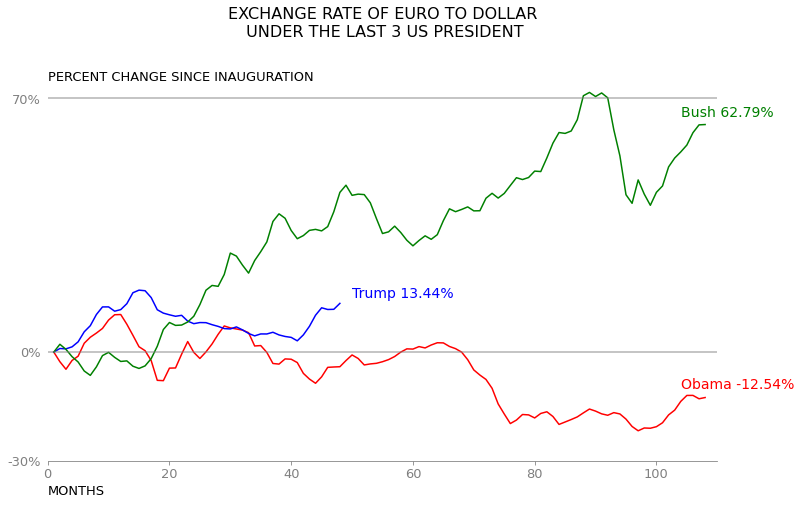

In [5]:
def convert_df(df):
    df['month'] = (df.index.year - df.index[0].year) * 12 + df.index.month
    df = df.groupby('month').mean()
    df['US_dollar'] = df['US_dollar'] / df['US_dollar'].iloc[0] - 1
    return df


# data
bush = [i for i in range(2001, 2010)]
obama = [i for i in range(2009, 2018)]
trump = [i for i in range(2017, 2021)]
o = convert_df(euro_to_dollar[euro_to_dollar.index.year.isin(obama)])
b = convert_df(euro_to_dollar[euro_to_dollar.index.year.isin(bush)])
t = convert_df(euro_to_dollar[euro_to_dollar.index.year.isin(trump)])

# plot
f, ax = plt.subplots(figsize=(12, 7))
ax.plot(o, color='red')
ax.plot(t, color='blue')
ax.plot(b, color='green')

# beautify
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.spines[['bottom']].set_color('grey')
ax.axhline(0, color='grey', alpha=0.6)
ax.axhline(0.7, color='grey', alpha=0.6)
ax.set_xlim(0, 110)
ax.set_ylim(-0.30, 0.75)
ax.set_xticklabels([i * 10 for i in range(0, 11, 2)], color='grey', size=13)
ax.set_yticks([-0.3, 0, 0.7])
ax.set_yticklabels([str(i) + '%' for i in [-30, 0, 70]], color='grey', size=13)
ax.tick_params(color='grey')
ax.tick_params(left=False)

# annotate
ax.annotate('Trump ' + '{:.2f}%'.format(t.US_dollar.iloc[-1] * 100),
            xy=(50, 0.15),
            size=14,
            color='blue')
ax.annotate('Obama ' + '{:.2f}%'.format(o.US_dollar.iloc[-1] * 100),
            xy=(104, -0.1),
            size=14,
            color='red')
ax.annotate('Bush ' + '{:.2f}%'.format(b.US_dollar.iloc[-1] * 100),
            xy=(104, 0.65),
            size=14,
            color='green')

# add label
ax.set_xlabel('MONTHS', loc='left', size=13)
ax.text(0, 0.75, 'PERCENT CHANGE SINCE INAUGURATION', size=13)
ax.set_title('EXCHANGE RATE OF EURO TO DOLLAR\n UNDER THE LAST 3 US PRESIDENT',
             y=1.1,
             size=16)

# download graph
# plt.savefig('D:\\Năm 3 - HK1\\Visualize\\Ex\\data\\3pres.jpg')

Text(0, 0.5, 'Exchange rate of Euro to USD')

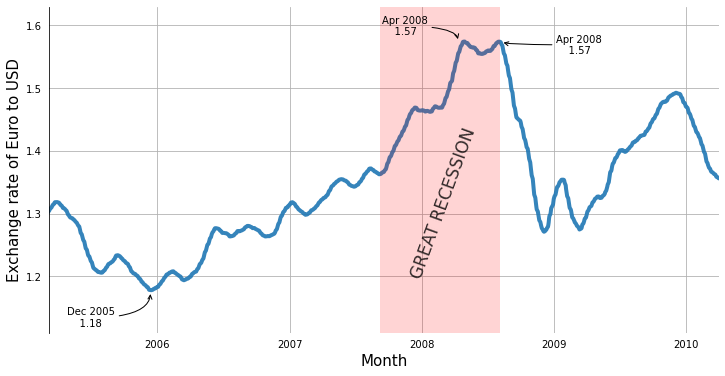

In [6]:
#plot
f, ax = plt.subplots(figsize=(12, 6))
ax.plot(euro_to_dollar[(euro_to_dollar.index.year>2004)&(euro_to_dollar.index.year<=2010)],\
        linewidth=4,alpha=0.9)
ax.grid(True)
ax.axvline(x=13930, linewidth=120, alpha=0.17, color='red')

#beautify
ax.set_xlim(12850, 14700)
ax.set_ylim(1.11, 1.63)
ax.spines[['right', 'bottom', 'top']].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_yticks([1.2, 1.3, 1.4, 1.5, 1.6])

#annotate
ax.annotate('Dec 2005\n    1.18',xy=(13130,1.175),xytext=(12900,1.12),\
           arrowprops = dict(arrowstyle = '->',\
                             connectionstyle = 'angle3,angleA=0,angleB=90'))
ax.annotate('Apr 2008\n    1.57',xy=(13980,1.575),xytext=(13770,1.585),\
           arrowprops = dict(arrowstyle = '->',\
                             connectionstyle = 'angle3,angleA=0,angleB=90'))
ax.annotate('Apr 2008\n    1.57',xytext=(14250,1.555),xy=(14100,1.574),\
           arrowprops = dict(arrowstyle = '->',\
                             connectionstyle = 'angle3,angleA=0,angleB=90'))
ax.text(13840, 1.2, 'GREAT RECESSION', rotation=70, size=17, alpha=0.8)

#add label
ax.set_xlabel('Month', size=15)
ax.set_ylabel('Exchange rate of Euro to USD', size=15)

# download graph
# plt.savefig('D:\\Năm 3 - HK1\\Visualize\\Ex\\data\\2008recess.jpg')

Text(0.5, 1.05, 'EUR-USD Exchange rate during the Coronavirus pandemic 2020')

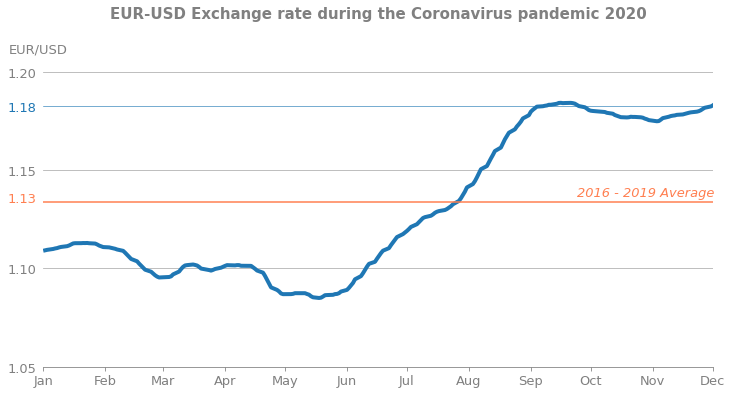

In [7]:
# plot
avg = euro_to_dollar[euro_to_dollar.index.year.isin([2016, 2017, 2018,
                                                     2019])].mean()
f, ax = plt.subplots(figsize=(12, 6))
ax.grid(axis='y')
ax.plot(euro_to_dollar[euro_to_dollar.index.year == 2020], linewidth=4)
ax.axhline(avg.values, color='coral')
ax.axhline(1.1825, linewidth=0.6)
# beautify
ax.set_xlim(18262, 18597)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],\
                   color='grey',size=13)
ax.set_yticks([1.05, 1.10, 1.15, 1.20])
ax.set_yticklabels(['1.05', '1.10', '1.15', '1.20'], color='grey', size=13)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.tick_params(color='grey')
ax.tick_params(left=False)

# add note
ax.text(18245, 1.21, 'EUR/USD', size=13, color='grey')
ax.text(18529, 1.137, '2016 - 2019 Average',\
        color='coral', size=13, fontstyle='italic')
ax.text(18244, avg, 1.13, size=13, color='coral')
ax.text(18244, 1.18, 1.18, size=13, color='#1f77b4')
ax.set_title('EUR-USD Exchange rate during the Coronavirus pandemic 2020',\
             size=15, y=1.05, fontweight='bold', color='grey')

# download graph
# plt.savefig('D:\\Năm 3 - HK1\\Visualize\\Ex\\data\\covid.jpg')